In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pickle

Populating the interactive namespace from numpy and matplotlib


In [3]:
h = .02  # step size in the mesh

#names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
#         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
#         "Quadratic Discriminant Analysis"]
names = ["RBF SVM","Random Forest"]

In [13]:
#classifiers = [
#    KNeighborsClassifier(3),
#    SVC(kernel="linear", C=0.025),
#    SVC(gamma=2, C=1),
#    DecisionTreeClassifier(max_depth=5),
#    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#    AdaBoostClassifier(),
#    GaussianNB(),
#    LinearDiscriminantAnalysis(),
#    QuadraticDiscriminantAnalysis()]

classifiers = [
    SVC(gamma=2, C=1),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]

In [5]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [6]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

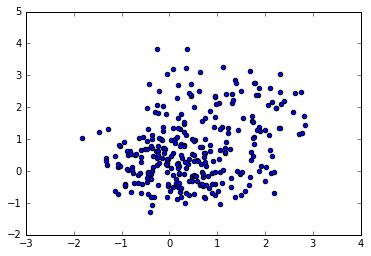

In [7]:
plt.scatter(datasets[0][0].T[0],datasets[0][0].T[1])
plt.scatter(datasets[1][0].T[0],datasets[1][0].T[1])
plt.scatter(datasets[2][0].T[0],datasets[2][0].T[1])

In [8]:
figure = plt.figure(figsize=(54, 18))
i = 1
# iterate over datasets

# preprocess dataset, split into training and test part
X, y = datasets[0]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

print shape(X)

(100, 2)


In [9]:
print X_train
print y_train

[[ 0.30920485 -0.127041  ]
 [-0.48691402  0.57259859]
 [-0.6851801   0.56462893]
 [-0.83190068  0.93244079]
 [-0.20216417  0.09829492]
 [ 0.59348201  0.25278868]
 [ 0.20764271  0.88856402]
 [-0.42443599  1.30854456]
 [-0.73153577  1.24236135]
 [-1.14359579  0.76280671]
 [ 1.89457786 -1.57392425]
 [ 1.35242892  0.60859541]
 [ 1.22467352 -1.45537741]
 [ 1.39730283  0.39040035]
 [-2.05161935  0.3295589 ]
 [ 0.67050908 -1.01221609]
 [-0.34194837 -0.50298565]
 [ 0.24942261  0.37041953]
 [ 0.50954902 -1.66427178]
 [-0.03734756  0.53962298]
 [-0.22465612  1.70271788]
 [ 0.19895122  2.27694191]
 [-1.63601617  1.14409337]
 [ 1.33380816 -0.73018114]
 [-0.33075371 -0.55325533]
 [ 0.98840214 -1.75933045]
 [-0.02974639 -0.63475756]
 [ 0.15350841  0.8912278 ]
 [-1.61181827 -1.16122353]
 [ 0.81773837  1.64300265]
 [-0.1636123  -1.53782127]
 [ 0.51038341 -1.09925804]
 [-0.62663858 -0.45097084]
 [ 0.15940018 -1.05506347]
 [ 0.89063568 -0.73843955]
 [-0.22120141  1.00868763]
 [-1.55182484  0.46910804]
 

([], <a list of 0 Text yticklabel objects>)

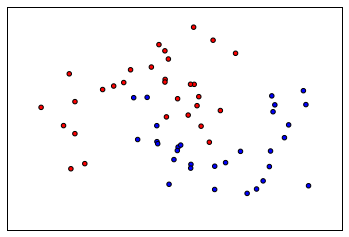

In [10]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
#plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
xlim(xx.min(), xx.max())
ylim(yy.min(), yy.max())
xticks(())
yticks(())
#i += 1

In [11]:
print shape(X_train)
print shape(y_train)
print shape(X_test)
print shape(y_test)

(60, 2)
(60,)
(40, 2)
(40,)


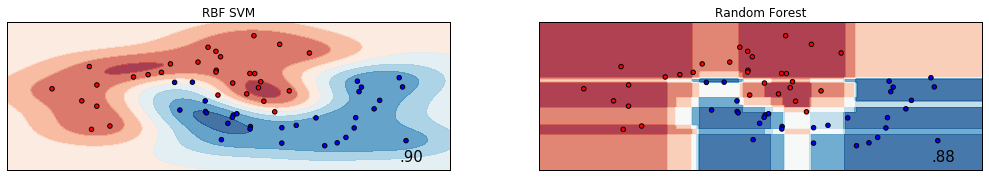

In [12]:
figure = plt.figure(figsize=(27, 9))
# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

In [14]:
# Read all datapoints from training and testing sets

all_file = open('/Users/jmartine/science/data/training_sets/agb_yso_data_serpens.pickle','rb')
col__3_6__4_5__serpens_agb,col__3_6__4_5__serpens_yso,col__3_6__5_8__serpens_agb,col__3_6__5_8__serpens_yso,col__5_8__8_0__serpens_agb,col__5_8__8_0__serpens_yso,col__4_5__5_8__serpens_agb,col__4_5__5_8__serpens_yso,col__4_5__8_0__serpens_agb,col__4_5__8_0__serpens_yso,col__3_6__8_0__serpens_agb,col__3_6__8_0__serpens_yso,col__3_6__serpens_agb,col__3_6__serpens_yso,col__4_5__serpens_agb,col__4_5__serpens_yso,col__5_8__serpens_agb,col__5_8__serpens_yso,col__8_0__serpens_agb,col__8_0__serpens_yso = pickle.load(all_file)

all_file = open('/Users/jmartine/science/data/training_sets/agb_yso_data_n1333.pickle','rb')
col__3_6__4_5__n1333_agb,col__3_6__4_5__n1333_yso,col__3_6__5_8__n1333_agb,col__3_6__5_8__n1333_yso,col__5_8__8_0__n1333_agb,col__5_8__8_0__n1333_yso,col__4_5__5_8__n1333_agb,col__4_5__5_8__n1333_yso,col__4_5__8_0__n1333_agb,col__4_5__8_0__n1333_yso,col__3_6__8_0__n1333_agb,col__3_6__8_0__n1333_yso,col__3_6__n1333_agb,col__3_6__n1333_yso,col__4_5__n1333_agb,col__4_5__n1333_yso,col__5_8__n1333_agb,col__5_8__n1333_yso,col__8_0__n1333_agb,col__8_0__n1333_yso = pickle.load(all_file)

all_file = open('/Users/jmartine/science/data/training_sets/agb_yso_data_ruffle.pickle','rb')
col__3_6__4_5__ruffle_agb,col__3_6__4_5__ruffle_yso,col__3_6__5_8__ruffle_agb,col__3_6__5_8__ruffle_yso,col__5_8__8_0__ruffle_agb,col__5_8__8_0__ruffle_yso,col__4_5__5_8__ruffle_agb,col__4_5__5_8__ruffle_yso,col__4_5__8_0__ruffle_agb,col__4_5__8_0__ruffle_yso,col__3_6__8_0__ruffle_agb,col__3_6__8_0__ruffle_yso,col__3_6__ruffle_agb,col__3_6__ruffle_yso,col__4_5__ruffle_agb,col__4_5__ruffle_yso,col__5_8__ruffle_agb,col__5_8__ruffle_yso,col__8_0__ruffle_agb,col__8_0__ruffle_yso = pickle.load(all_file)

all_file = open('/Users/jmartine/science/data/training_sets/agb_yso_data_reiter.pickle','rb')
col__3_6__4_5__reiter_agb,col__3_6__4_5__reiter_yso,col__3_6__5_8__reiter_agb,col__3_6__5_8__reiter_yso,col__5_8__8_0__reiter_agb,col__5_8__8_0__reiter_yso,col__4_5__5_8__reiter_agb,col__4_5__5_8__reiter_yso,col__4_5__8_0__reiter_agb,col__4_5__8_0__reiter_yso,col__3_6__8_0__reiter_agb,col__3_6__8_0__reiter_yso,col__3_6__reiter_agb,col__3_6__reiter_yso,col__4_5__reiter_agb,col__4_5__reiter_yso,col__5_8__reiter_agb,col__5_8__reiter_yso,col__8_0__reiter_agb,col__8_0__reiter_yso = pickle.load(all_file)

In [15]:
# Splitting AGBs and YSOs. Cleaning the sample. 

col__5_8__8_0__yso = append(col__5_8__8_0__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__5_8__8_0__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__3_6__4_5__yso = append(col__3_6__4_5__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__3_6__4_5__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__3_6__5_8__yso = append(col__3_6__5_8__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__3_6__5_8__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__4_5__5_8__yso = append(col__4_5__5_8__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__4_5__5_8__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__4_5__8_0__yso = append(col__4_5__8_0__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__4_5__8_0__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__3_6__8_0__yso = append(col__3_6__8_0__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__3_6__8_0__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__3_6__yso = append(col__3_6__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__3_6__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__4_5__yso = append(col__4_5__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__4_5__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__5_8__yso = append(col__5_8__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__5_8__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__8_0__yso = append(col__8_0__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__8_0__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])

#plt.scatter(col__5_8__8_0__yso,col__3_6__4_5__yso)

In [16]:
# Splitting AGBs and YSOs. Cleaning the sample. 

col__5_8__8_0__agb = append(col__5_8__8_0__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__5_8__8_0__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__3_6__4_5__agb = append(col__3_6__4_5__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__3_6__4_5__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__3_6__5_8__agb = append(col__3_6__5_8__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__3_6__5_8__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__4_5__5_8__agb = append(col__4_5__5_8__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__4_5__5_8__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__4_5__8_0__agb = append(col__4_5__8_0__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__4_5__8_0__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__3_6__8_0__agb = append(col__3_6__8_0__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__3_6__8_0__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__3_6__agb = append(col__3_6__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__3_6__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__4_5__agb = append(col__4_5__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__4_5__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__5_8__agb = append(col__5_8__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__5_8__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__8_0__agb = append(col__8_0__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__8_0__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
#plt.scatter(col__5_8__8_0__agb,col__3_6__4_5__agb)

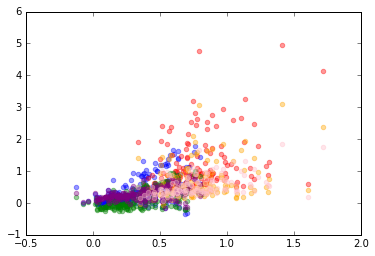

In [17]:
plt.scatter(col__5_8__8_0__agb,col__3_6__5_8__agb,color='blue',alpha=0.4)
plt.scatter(col__5_8__8_0__yso,col__3_6__5_8__yso,color='red',alpha=0.4)
plt.scatter(col__5_8__8_0__agb,col__3_6__4_5__agb,color='green',alpha=0.4)
plt.scatter(col__5_8__8_0__yso,col__3_6__4_5__yso,color='orange',alpha=0.4)
plt.scatter(col__5_8__8_0__agb,col__4_5__5_8__agb,color='purple',alpha=0.4)
plt.scatter(col__5_8__8_0__yso,col__4_5__5_8__yso,color='pink',alpha=0.4)

In [18]:
print shape(col__5_8__8_0__agb)
print shape(col__5_8__8_0__yso)

(200,)
(134,)


In [19]:
# Select training data

size_training_set = 70

mask1 = np.ones(len(col__5_8__8_0__agb), dtype=bool)
mask2 = np.ones(len(col__5_8__8_0__yso), dtype=bool)

at1 = np.arange(len(col__5_8__8_0__agb))
at2 = np.arange(len(col__5_8__8_0__yso))

numpy.random.shuffle(at1)
it1 = at1[0:size_training_set]
numpy.random.shuffle(at2)
it2 = at2[0:size_training_set]

mask1[it1] = False
mask2[it2] = False

print shape(mask1)
print shape(mask2)

(200,)
(134,)


(130,)
(130,)
(64,)
(64,)


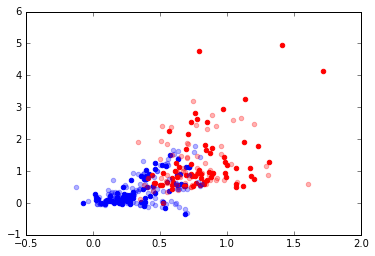

In [20]:
plt.scatter(col__5_8__8_0__agb[it1],col__3_6__5_8__agb[it1],color='blue')
plt.scatter(col__5_8__8_0__yso[it2],col__3_6__5_8__yso[it2],color='red')
plt.scatter(col__5_8__8_0__agb[mask1],col__3_6__5_8__agb[mask1],color='blue',alpha=0.3)
plt.scatter(col__5_8__8_0__yso[mask2],col__3_6__5_8__yso[mask2],color='red',alpha=0.3)
print shape(col__5_8__8_0__agb[mask1])
print shape(col__3_6__5_8__agb[mask1])
print shape(col__5_8__8_0__yso[mask2])
print shape(col__3_6__5_8__yso[mask2])

In [21]:
# TRAINING SET
# USING 3 FEATURES
# 0's are YSOs, 1's are AGBs
col_agb_train = np.array([col__5_8__8_0__agb[it1],col__3_6__5_8__agb[it1],col__4_5__5_8__agb[it1]])
col_agb_train = col_agb_train.T
col_yso_train = np.array([col__5_8__8_0__yso[it2],col__3_6__5_8__yso[it2],col__4_5__5_8__yso[it2]])
col_yso_train = col_yso_train.T
col_train = concatenate((col_agb_train,col_yso_train),axis=0)
lab_train = np.zeros(len(col_train))
lab_train[0:size_training_set] = 1
lab_train = lab_train.astype(int)
ind = arange(len(col_train))
random.shuffle(ind)
col_train = col_train[ind]
lab_train = lab_train[ind]

print shape(col_yso_train)

(70, 3)


In [22]:
# TEST SET
# 0's are YSOs, 1's are AGBs
col_agb_test = np.array([col__5_8__8_0__agb[mask1],col__3_6__5_8__agb[mask1],col__4_5__5_8__agb[mask1]])
col_agb_test = col_agb_test.T
col_yso_test = np.array([col__5_8__8_0__yso[mask2],col__3_6__5_8__yso[mask2],col__4_5__5_8__yso[mask2]])
col_yso_test = col_yso_test.T
col_test = concatenate((col_agb_test,col_yso_test),axis=0)
lab_test = np.zeros(len(col_test))
lab_test[0:len(col__5_8__8_0__agb[mask1])] = 1
lab_test = lab_test.astype(int)
ind = arange(len(col_test))
random.shuffle(ind)
col_test = col_test[ind]
lab_test = lab_test[ind]

In [23]:
indu = ~isnan(col_test[:,1])
col_test = col_test[indu]
lab_test = lab_test[indu]

indu = ~isnan(col_train[:,1])
col_train = col_train[indu]
lab_train = lab_train[indu]

In [24]:
x_min, x_max = -0.5, 2.0
y_min, y_max = -1.0, 3.5
z_min, z_max = -1.5, 2.0
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h), np.arange(z_min, z_max, h))

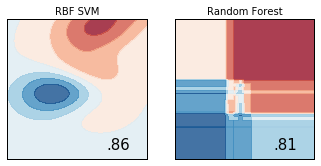

In [25]:
i = 1
figure = plt.figure(figsize=(5.5, 2.5))
ax.set_rasterization_zorder(1) 
# iterate over classifiers
for name, clf in zip(names, classifiers):
    #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax = plt.subplot(1, 2, i)
    clf.fit(col_train, lab_train)
    score = clf.score(col_test, lab_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel(),])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx[:,:,150], yy[:,:,150], Z[:,:,150], cmap=cm, alpha=.8)
    
    ## Plot also the training points
    #ax.scatter(col_train[:, 0], col_train[:, 1], c=lab_train, cmap=cm_bright,s=10)
    ## and testing points
    #ax.scatter(col_test[:, 0], col_test[:, 1], c=lab_test, cmap=cm_bright,alpha=0.5,s=10,zorder=1.0)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name,size=10)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    #ax.set_xlim(-0.5, 2.0)
    #ax.set_ylim(-1.0, 3.5)
    i += 1
    
#plt.savefig('ML_classification_v3_a.ps')

In [88]:
print shape(Z)

(4921875,)
